<h1 align="center"> Statistiques Multivariées (DS): Projet de reconnaissance vocale </h1>



Membre 1: OUBRO Adil

Membre 2: SARBANE Abderrahmane

Membre 3: DAHANI Elkhalil

Membre 4: MORCHID Saad




# Installation
Commencer d'abord par installer les packages nécessaires en lançant dans un terminal:
- `pip install -r requirements.txt`

Ou directement dans une cellule notebook:

- `%pip install -r requirements.txt`

In [1]:
# pip install -r requirements.txt

# Les données:
Le dossier "data/raw" contient des milliers d'enregistrements audio de 10 personnes (5 hommes et 5 femmes) américaines. Le but de ce projet et d'analyser ces données et de construire un modèle simple de reconnaissance vocale. C'est à dire, reconnaitre la personne qui parle parmi les 10. Voici à quoi ressemble un enregistrement:

In [2]:
# pip install librosa

In [3]:
from IPython.display import Audio
import librosa

y1, sr1 = librosa.load("data/raw/f0001_us_f0001_00001.wav", sr=None)
Audio(data=y1, rate=sr1)



In [4]:
print(y1)
print(f"La taille du fichier audio est {y1.shape}")

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4414062e-04
 -1.8310547e-04 -6.1035156e-05]
La taille du fichier audio est (74880,)


Nous allons commencer par extraire des informations sur le timbre (en utilisant le domaine temps-fréquence) de l'enregistrement avec les Mel Frequency Cepstral Coefficient (MFCC):

In [5]:
mfcc = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)
print(mfcc)
print(f"La taille des coefficients est {mfcc.shape}")

[[-676.00336   -628.5445    -630.0368    ... -587.2241    -618.89246
  -651.83386  ]
 [  37.224003    47.902386    46.276775  ...   56.47776     54.10054
    50.659206 ]
 [  23.102505    21.160933    22.697374  ...   15.998568    18.138077
    22.942192 ]
 ...
 [   6.6952944    6.119456     2.151738  ...   12.616104     8.677282
     9.154581 ]
 [   6.1928906    1.8975844    1.6943827 ...   17.547215    14.1192665
    11.321548 ]
 [  -1.1161003   -5.9224443   -5.2735295 ...    8.176835     5.3311367
     3.8546567]]
La taille des coefficients est (10, 147)


On peut visualiser ces 10 coefficients dans le temps:

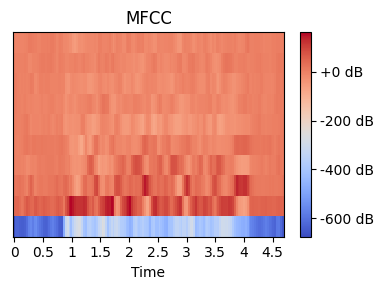

In [6]:
from matplotlib import pyplot as plt

# Plotting the MFCCs
plt.figure(figsize=(4, 3))
librosa.display.specshow(mfcc, x_axis='time', sr=sr1)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()


Nous allons résumer ces coefficients en calculant leur moyenne temporelle. Ainsi, chaque fichier audio doit être transformé par un vecteur de taille 13:

In [7]:
mfcc_moyenne = mfcc.mean(axis=1)
mfcc_moyenne

array([-447.81406  ,   63.020832 ,   30.160309 ,    7.9655695,
          2.1016788,  -22.293121 ,   -7.862449 ,  -12.084611 ,
         -1.8244214,   -6.8137836], dtype=float32)

On construit donc le dataset avec la fonction suivante:


In [8]:
import pandas as pd

folder_path = "data/raw/"
n_recordings = 50
n_coefs = 10
data = []
for gender in ["m", "f"]:
    for speaker in range(1, 6):
        for recording_id in range(1, n_recordings + 1):
            file_name = "%s%04d_us_%s%04d_%05d.wav" %(gender, speaker, gender, speaker, recording_id)
            y, sr = librosa.load(folder_path + file_name)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coefs).mean(axis=1)

            speaker_id = speaker - 1
            if gender == "f":
                speaker_id += 5
            row_data = {
                'FileName': file_name,
                'Gender': gender,
                'SpeakerID': speaker_id,
                'RecordingID': recording_id,
            }
            for i in range(n_coefs):
                row_data[f'MFCC_{i+1}'] = mfcc[i]
            
            data.append(row_data)

df = pd.DataFrame(data)

In [9]:
df.head(3)

FileName Gender  SpeakerID  RecordingID      MFCC_1  \
0  m0001_us_m0001_00001.wav      m          0            1 -432.045410   
1  m0001_us_m0001_00002.wav      m          0            2 -448.635986   
2  m0001_us_m0001_00003.wav      m          0            3 -433.696320   

       MFCC_2    MFCC_3     MFCC_4     MFCC_5     MFCC_6    MFCC_7    MFCC_8  \
0  119.769264 -3.836545  25.336601 -13.802795  16.731417 -2.733350  2.620323   
1  114.177422 -5.153250  16.764275 -20.626694  20.666161 -5.741008  9.305303   
2   94.268814 -3.704444  24.321095 -15.773800  16.456257  0.998080  5.189481   

     MFCC_9   MFCC_10  
0 -9.290769  3.606286  
1 -5.688132  0.833428  
2 -8.003876  4.879941

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FileName     500 non-null    object 
 1   Gender       500 non-null    object 
 2   SpeakerID    500 non-null    int64  
 3   RecordingID  500 non-null    int64  
 4   MFCC_1       500 non-null    float32
 5   MFCC_2       500 non-null    float32
 6   MFCC_3       500 non-null    float32
 7   MFCC_4       500 non-null    float32
 8   MFCC_5       500 non-null    float32
 9   MFCC_6       500 non-null    float32
 10  MFCC_7       500 non-null    float32
 11  MFCC_8       500 non-null    float32
 12  MFCC_9       500 non-null    float32
 13  MFCC_10      500 non-null    float32
dtypes: float32(10), int64(2), object(2)
memory usage: 35.3+ KB


# Partie I:
#### 1. Effectuez une PCA sur les coefficients MFCC en visualisant le genre avec deux couleurs différentes. 


In [11]:
MFCC = df[["MFCC_1", "MFCC_2", "MFCC_3", "MFCC_4", "MFCC_5", "MFCC_6", "MFCC_7", "MFCC_8", "MFCC_9", "MFCC_10"]]

In [12]:
MFCC.head(3)

MFCC_1      MFCC_2    MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0 -432.045410  119.769264 -3.836545  25.336601 -13.802795  16.731417   
1 -448.635986  114.177422 -5.153250  16.764275 -20.626694  20.666161   
2 -433.696320   94.268814 -3.704444  24.321095 -15.773800  16.456257   

     MFCC_7    MFCC_8    MFCC_9   MFCC_10  
0 -2.733350  2.620323 -9.290769  3.606286  
1 -5.741008  9.305303 -5.688132  0.833428  
2  0.998080  5.189481 -8.003876  4.879941

**- Application du PCA sur les coefficents MFCC :**

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pca = PCA()
pca.fit(MFCC)

PCA()

In [14]:
cov_matrix = pca.get_covariance()

In [15]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1791.3263     257.43176    107.71932     79.5849      64.68233
   37.889587    25.222797    15.465503    10.812967     5.9057603]
[0.74761915 0.10744046 0.04495721 0.03321516 0.0269955  0.01581341
 0.01052686 0.00645461 0.00451285 0.0024648 ]


In [16]:
import numpy as np

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x) for x in range(1,11)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1         1791.326294                  75.0                   75.0
1      Dim2          257.431763                  11.0                   86.0
2      Dim3          107.719322                   4.0                   90.0
3      Dim4           79.584900                   3.0                   93.0
4      Dim5           64.682327                   3.0                   96.0
5      Dim6           37.889587                   2.0                   98.0
6      Dim7           25.222797                   1.0                   99.0
7      Dim8           15.465503                   1.0                   99.0
8      Dim9           10.812967                   0.0                  100.0
9     Dim10            5.905760                   0.0                  100.0

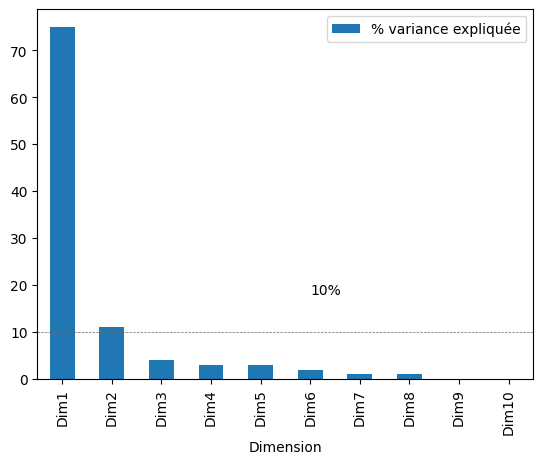

In [17]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "10%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 10 = 100 / 10 (nb dimensions)
plt.show()

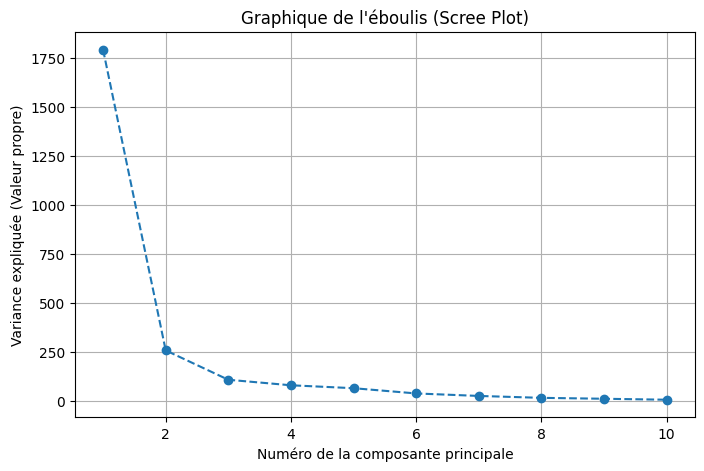

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.title("Graphique de l'éboulis (Scree Plot)")
plt.xlabel("Numéro de la composante principale")
plt.ylabel("Variance expliquée (Valeur propre)")
plt.grid()
plt.show()

D'après le graphique de l'éboulis, il suffit de retenir deux composantes principales pour représenter les données.

In [19]:
MFCC_pca = pca.transform(MFCC)

In [20]:
MFCC_pca_2d = pd.DataFrame({
    "Gender" : df["Gender"],
    "SpeakerID" : df["SpeakerID"],
    "RecordingID" : df["RecordingID"],
    "Dim1" : MFCC_pca[:,0], 
    "Dim2" : MFCC_pca[:,1]
})

MFCC_pca_2d.head()

Gender  SpeakerID  RecordingID       Dim1       Dim2
0      m          0            1  74.981552  23.042948
1      m          0            2  58.006413  21.393785
2      m          0            3  70.789352   3.556875
3      m          0            4  79.974297  17.148336
4      m          0            5  92.951569   6.036774

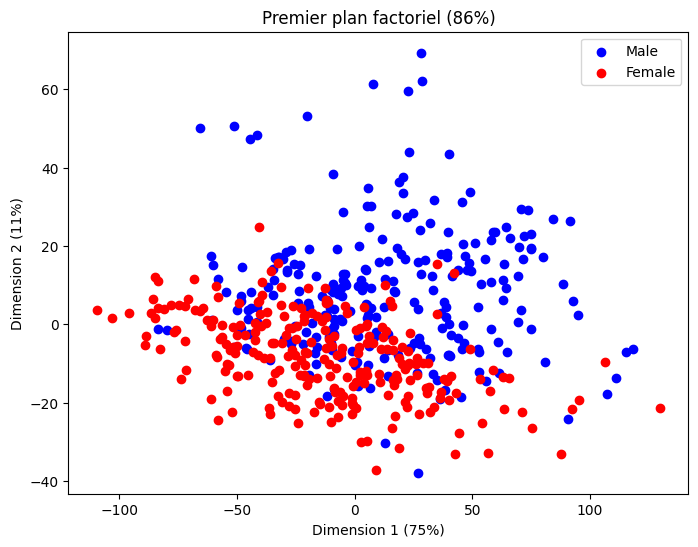

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(MFCC_pca_2d[MFCC_pca_2d['Gender'] == 'm']['Dim1'], MFCC_pca_2d[MFCC_pca_2d['Gender'] == 'm']['Dim2'], color='blue', label='Male')
plt.scatter(MFCC_pca_2d[MFCC_pca_2d['Gender'] == 'f']['Dim1'], MFCC_pca_2d[MFCC_pca_2d['Gender'] == 'f']['Dim2'], color='red', label='Female')

# Ajout des labels et légende
plt.xlabel('Dimension 1 (75%)')
plt.ylabel('Dimension 2 (11%)')
plt.title('Premier plan factoriel (86%)')
plt.legend()

plt.show()

En deux dimensions, il est difficile de visualiser les données, donc on ajoute une troisième dimension pour mieux distinguer la différence entre les hommes et les femmes.

In [22]:
MFCC_pca_3d = pd.DataFrame({
    "Gender" : df["Gender"],
    "SpeakerID" : df["SpeakerID"],
    "RecordingID" : df["RecordingID"],
    "Dim1" : MFCC_pca[:,0], 
    "Dim2" : MFCC_pca[:,1],
    "Dim3" : MFCC_pca[:,2]
})

MFCC_pca_3d.head()

Gender  SpeakerID  RecordingID       Dim1       Dim2       Dim3
0      m          0            1  74.981552  23.042948  -1.260432
1      m          0            2  58.006413  21.393785   0.759616
2      m          0            3  70.789352   3.556875  13.437194
3      m          0            4  79.974297  17.148336   1.050679
4      m          0            5  92.951569   6.036774   2.475928

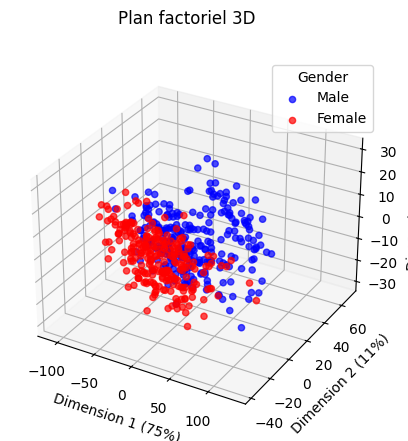

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Création de la figure et de l'axe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Points masculins
ax.scatter(
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "m"]["Dim1"],
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "m"]["Dim2"],
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "m"]["Dim3"],
    c="blue", label="Male", alpha=0.7
)

# Points féminins
ax.scatter(
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "f"]["Dim1"],
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "f"]["Dim2"],
    MFCC_pca_3d[MFCC_pca_3d["Gender"] == "f"]["Dim3"],
    c="red", label="Female", alpha=0.7
)

# Ajouter les labels et le titre
ax.set_xlabel("Dimension 1 (75%)")
ax.set_ylabel("Dimension 2 (11%)")
ax.set_zlabel("Dimension 3 (4%)")
plt.suptitle("Plan factoriel 3D")

# Légende
plt.legend(title="Gender")

# Afficher le graphique
plt.show()


In [24]:
import plotly.express as px

# Création de la figure interactive
fig = px.scatter_3d(
    MFCC_pca_3d,
    x="Dim1", 
    y="Dim2", 
    z="Dim3",
    color="Gender",
    color_discrete_map={"m": "blue", "f": "red"},
    labels={"Dim1": "Dimension 1 (75%)", "Dim2": "Dimension 2 (11%)", "Dim3": "Dimension 3 (4%)"},
    title="Plan factoriel 3D"
)

# Ajuster la transparence des points
fig.update_traces(marker=dict(opacity=0.7))

# Afficher le graphique interactif
fig.show()


C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


#### 2. On suspecte que les enregistrements du `speaker` 4 forment deux sous-groupes très distincts: les `recordingID` paires et impaires. Effectuez un test pour vérifier cette hypothèse.

In [25]:
speaker_4 = MFCC_pca_2d[MFCC_pca_2d["SpeakerID"] == 4]
speaker_4.head(3)

Gender  SpeakerID  RecordingID       Dim1       Dim2
200      m          4            1  61.021351  -4.473594
201      m          4            2  13.972762  -6.441866
202      m          4            3  45.136932 -18.494841

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 != 0]['Dim1'], MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 != 0]['Dim2'], color='blue', label="RecordingID impair")
plt.scatter(MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 0]['Dim1'], MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 0]['Dim2'], color='red', label="RecordingID pair")

# Ajout des labels et légende
plt.xlabel('Dimension 1 (75%)')
plt.ylabel('Dimension 2 (11%)')
plt.title('Premier plan factoriel (86%)')
plt.legend()

plt.show()

In [27]:
# Nuage de points avec des couleurs en fonction du genre
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Points masculins
ax.scatter(
    MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 1]["Dim1"],
    MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 1]["Dim2"],
    c="blue", label="RecordingID impair", alpha=0.7
)

# Points féminins
ax.scatter(
    MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 0]["Dim1"],
    MFCC_pca_2d[MFCC_pca_2d["RecordingID"] % 2 == 0]["Dim2"],
    c="red", label="RecordingID pair", alpha=0.7
)

# Ajouter les labels et le titre
ax.set_xlabel("Dimension 1 (75%)")
ax.set_ylabel("Dimension 2 (11%)")
ax.set_zlabel("Dimension 3 (4%)")
plt.suptitle("Plan factoriel 3D")

# Légende
plt.legend(title="RecordingID")

# Afficher le graphique
plt.show()

In [28]:
speaker_4[["Dim1", "Dim2"]].describe()

Dim1       Dim2
count   50.000000  50.000000
mean    39.527695  -5.960037
std     38.692482   9.180362
min    -83.468163 -30.238464
25%     13.252153 -12.308104
50%     39.966640  -6.332332
75%     61.174410  -1.196697
max    118.373749  13.798037

In [29]:
speaker_4_pair = speaker_4[speaker_4["RecordingID"] % 2 == 0]
speaker_4_impair = speaker_4[speaker_4["RecordingID"] % 2 != 0]

In [30]:
speaker_4_pair[['Dim1', 'Dim2']].describe()

Dim1       Dim2
count   25.000000  25.000000
mean    41.113129  -6.477667
std     40.835220   9.686079
min    -83.468163 -30.238464
25%     14.111476 -12.195851
50%     37.002716  -6.441866
75%     61.225430  -1.184384
max    118.373749  12.812655

In [31]:
speaker_4_impair[['Dim1', 'Dim2']].describe()

Dim1       Dim2
count   25.000000  25.000000
mean    37.942257  -5.442409
std     37.200047   8.814272
min    -20.616003 -18.494841
25%      6.625101 -12.848761
50%     40.705502  -5.852895
75%     61.021351  -1.233636
max    110.975006  13.798037

- Les deux distributions sont similaires en termes de moyennes, avec des écarts-types proches, bien que Dim1 montre une légère variabilité supérieure dans la première distribution.

**- Hypothèse nulle $ H_0 \$ :** Les enregistrements pairs et impairs n'ont pas de différences significatives sur les dimensions Dim1 et Dim2. Cela implique que la moyenne multivariée des enregistrements pairs est la même que celle des enregistrements impairs :  

$$ \mu_{\text{pair}}  =  \mu_{\text{impair}} $$

où $ \mu_{\text{pair}} $ et $ \mu_{\text{impair}} $ représentent respectivement les moyennes multivariées des enregistrements pairs et impairs.

**- Hypothèse alternative $ H_1 $ :** Il existe une différence significative entre les enregistrements pairs et impairs sur au moins une des dimensions :

$$ \mu_{\text{pair}}  ≠  \mu_{\text{impair}} $$

**- Test de Hotelling :**

In [32]:
speaker4_pair = speaker_4_pair[['Dim1', 'Dim2']]
speaker4_impair = speaker_4_impair[['Dim1', 'Dim2']]

In [33]:
# Taille des échantillons
n1, n2 = len(speaker4_pair), len(speaker4_impair)

$$ \mu_{\text{pair}} = \frac{1}{n_{\text{pair}}} \sum_{i=1}^{n_{\text{pair}}} X_{i}^{(\text{pair})}, \quad \mu_{\text{impair}} = \frac{1}{n_{\text{impair}}} \sum_{i=1}^{n_{\text{impair}}} X_{i}^{(\text{impair})} $$

In [34]:
# Calcul des moyennes des deux groupes
mean1 = speaker4_pair.mean().values
mean2 = speaker4_impair.mean().values

$$ S_{\text{pair}} = \frac{1}{n_{\text{pair}} - 1} \sum_{i=1}^{n_{\text{pair}}} \left( X_{i}^{(\text{pair})} - \mu_{\text{pair}} \right) \left( X_{i}^{(\text{pair})} - \mu_{\text{pair}} \right)^T $$

$$ S_{\text{impair}} = \frac{1}{n_{\text{impair}} - 1} \sum_{i=1}^{n_{\text{impair}}} \left( X_{i}^{(\text{impair})} - \mu_{\text{impair}} \right) \left( X_{i}^{(\text{impair})} - \mu_{\text{impair}} \right)^T $$


In [35]:
# Calcul des matrices de covariance des deux groupes
cov1 = np.cov(speaker4_pair.T)
cov2 = np.cov(speaker4_impair.T)

$$ S_p = \frac{(n_{\text{pair}} - 1) S_{\text{pair}} + (n_{\text{impair}} - 1) S_{\text{impair}}}{n_{\text{pair}} + n_{\text{impair}} - 2} $$


In [36]:
# Matrice de covariance pondérée (estimée)
Sp = ((n1 - 1) * cov1 + (n2 - 1) * cov2) / (n1 + n2 - 2)

$$ \Delta \mu = \mu_{\text{pair}} - \mu_{\text{impair}} $$

$$ T^2 = \frac{n_{\text{pair}} n_{\text{impair}}}{n_{\text{pair}} + n_{\text{impair}}} \Delta \mu^T S_p^{-1} \Delta \mu $$


In [37]:
# Différence entre les moyennes
mean_diff = mean1 - mean2

# Calcul de la statistique T^2
T_squared = (n1 * n2) / (n1 + n2) * mean_diff.T @ np.linalg.inv(Sp) @ mean_diff

$$ F = \frac{(n_{\text{pair}} + n_{\text{impair}} - 2) \cdot p \cdot T^2}{(n_{\text{pair}} + n_{\text{impair}} - p - 1)} $$

$$ df_1 = p $$

$$ df_2 = n_{\text{pair}} + n_{\text{impair}} - p - 1 $$

$$ \text{p-value} = 1 - F_{\text{cdf}}(F, df_1, df_2) $$

In [38]:
from scipy.stats import f

# Conversion de T^2 en statistique F
p = len(mean_diff)  # Nombre de dimensions (2 dans ce cas)
F_statistic = (T_squared * (n1 + n2 - p - 1)) / ((n1 + n2 - 2) * p)

# Degrés de liberté pour le test F
df1, df2 = p, n1 + n2 - p - 1

# Calcul de la p-valeur
p_value = 1 - f.cdf(F_statistic, df1, df2)


In [39]:
# Affichage des résultats
print("Statistique T^2 de Hotelling:", T_squared)
print("Statistique F correspondante:", F_statistic)
print("Degrés de liberté:", df1, "et", df2)
print("p-valeur:", p_value)

Statistique T^2 de Hotelling: 0.2184231776036175
Statistique F correspondante: 0.10693634736843775
Degrés de liberté: 2 et 47
p-valeur: 0.8988008643891057


In [40]:
# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une différence significative entre les deux groupes.")
else:
    print("Aucune différence significative n'a été trouvée entre les deux groupes.")

Aucune différence significative n'a été trouvée entre les deux groupes.


#### 3. Proposez une analyse statistique (et effectuez la) pour évaluer si différence entre les hommes et les femmes est significative. 


**- Hypothèse nulle $ H_0 \$ :** Les enregistrements pairs et impairs n'ont pas de différences significatives sur les dimensions Dim1 et Dim2. Cela implique que la moyenne multivariée des enregistrements pairs est la même que celle des enregistrements impairs :  

$$ \mu_{\text{male}}  =  \mu_{\text{female}} $$

où $ \mu_{\text{male}} $ et $ \mu_{\text{female}} $ représentent respectivement les moyennes multivariées des enregistrements male et female.

**- Hypothèse alternative $ H_1 $ :** Il existe une différence significative entre les enregistrements pairs et impairs sur au moins une des dimensions :

$$ \mu_{\text{male}}  ≠  \mu_{\text{female}} $$

**- Test de Hotelling :**

In [41]:
group_male = MFCC_pca_2d[MFCC_pca_2d["Gender"] == 'm']
group_female = MFCC_pca_2d[MFCC_pca_2d["Gender"] == 'f']

In [42]:
group_male_t = group_male[['Dim1', 'Dim2']]
group_female_t = group_female[['Dim1', 'Dim2']]

In [43]:
# Taille des échantillons
n1, n2 = len(group_male_t), len(group_female_t)

# Calcul des moyennes des deux groupes
mean1 = group_male_t.mean().values
mean2 = group_female_t.mean().values

# Calcul des matrices de covariance des deux groupes
cov1 = np.cov(group_male_t.T)
cov2 = np.cov(group_female_t.T)

# Matrice de covariance pondérée (estimée)
Sp = ((n1 - 1) * cov1 + (n2 - 1) * cov2) / (n1 + n2 - 2)

# Différence entre les moyennes
mean_diff = mean1 - mean2

# Calcul de la statistique T^2
T_squared = (n1 * n2) / (n1 + n2) * mean_diff.T @ np.linalg.inv(Sp) @ mean_diff

# Conversion de T^2 en statistique F
p = len(mean_diff)  # Nombre de dimensions (2 dans ce cas)
F_statistic = (T_squared * (n1 + n2 - p - 1)) / ((n1 + n2 - 2) * p)

# Degrés de liberté pour le test F
df1, df2 = p, n1 + n2 - p - 1

# Calcul de la p-valeur
p_value = 1 - f.cdf(F_statistic, df1, df2)

# Affichage des résultats
print("Statistique T^2 de Hotelling:", T_squared)
print("Statistique F correspondante:", F_statistic)
print("Degrés de liberté:", df1, "et", df2)
print("p-valeur:", p_value)

Statistique T^2 de Hotelling: 276.99492319872394
Statistique F correspondante: 138.2193542467528
Degrés de liberté: 2 et 497
p-valeur: 1.1102230246251565e-16


In [44]:
# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une différence significative entre les deux groupes.")
else:
    print("Aucune différence significative n'a été trouvée entre les deux groupes.")

Il y a une différence significative entre les deux groupes.


#### 4. Compte tenu de ce résultat, comment peut-on implémenter un modèle de prédiction (avec numpy seulement) du sexe basé sur le calcul d'une distance ? 


La distance de Mahalanobis est une mesure de la distance entre un point $ \mathbf{x} $ et une distribution multivariée de points caractérisée par une moyenne $ \boldsymbol{\mu} $ et une matrice de covariance $ \Sigma $. Elle est définie par la formule suivante :


$$ D_{\Sigma}(\mathbf{x}, \boldsymbol{\mu}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})} $$


où :  
- $ \mathbf{x} $ est le vecteur de coordonnées du point   
- $ \boldsymbol{\mu} $ est le vecteur de moyennes des variables   
- $ \Sigma^{-1} $ est l'inverse de la matrice de covariance.

Cette distance prend en compte la variance des données et les corrélations entre les variables, ce qui la rend adaptée aux données multidimensionnelles.


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Données d'entraînement
X = MFCC_pca_2d[['Dim1', 'Dim2']].values  # Caractéristiques d'entraînement
y = np.where(MFCC_pca_2d['Gender'] == 'm', 0, 1)  # 'm' -> 0 et 'f' -> 1

# Séparer les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcul des noyaux (centroïdes) pour chaque classe
centroid_male = X_train[y_train == 0].mean(axis=0)  # Noyau pour la classe "Male"
centroid_female = X_train[y_train == 1].mean(axis=0)  # Noyau pour la classe "Female"

# Matrices de covariance pour chaque classe
cov_male = np.cov(X_train[y_train == 0], rowvar=False)
cov_female = np.cov(X_train[y_train == 1], rowvar=False)

# Fonction pour calculer la distance de Mahalanobis
def mahalanobis_distance(point, centroid, cov_matrix):
    diff = point - centroid
    return np.sqrt(diff.T @ np.linalg.inv(cov_matrix) @ diff)

# Prédiction de la classe d'un nouveau point
def predict_gender(test_point):
    # Calcul des distances de Mahalanobis entre le point de test et les noyaux
    distance_to_male = mahalanobis_distance(test_point, centroid_male, cov_male)
    distance_to_female = mahalanobis_distance(test_point, centroid_female, cov_female)
    
    # Choisir la classe avec la distance minimale et retourner 0 pour 'Male' et 1 pour 'Female'
    return 0 if distance_to_male < distance_to_female else 1

# Prédictions sur l'ensemble de test
y_pred = [predict_gender(point) for point in X_test]

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle sur les données de test:", accuracy)

Précision du modèle sur les données de test: 0.74


# Partie II: Reconnaissance vocale
On souhaite désormais apprendre à prédire `Y = speaker_id` avec les données `X = MFCCS` en utilisant des modèles de classification (avec scikit-learn). On découpe le dataset en deux parties:
- `(X_train, y_train)`: utilisé pour "entrainer" le modèle, c-à-d on suppose que les `y_train` sont connues.
- `(X_train, y_test)`: utilisé pour "tester" le modèle, c-à-d on suppose que les `y_train` ne sont pas connues à l'avance et sont utilisés uniquement après avoir entrainé le modèle pour l'évaluer.


In [46]:
from sklearn.model_selection import train_test_split

X = df[[f"MFCC_{i}" for i in range(1, 11)]].values
y = df.SpeakerID.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

#### 5. Évaluez la performance du modèle Naive Bayes en terme de précision de prédiction sur le train et le test. 

- Avant d'appliquer l'algorithme de Naive Bayes, il est important de vérifier l'indépendance entre les coefficients MFCC.  
On calcule la matrice de corrélation entre les coefficients MFCC pour évaluer le degré de dépendance entre eux.

In [47]:
df.columns

Index(['FileName', 'Gender', 'SpeakerID', 'RecordingID', 'MFCC_1', 'MFCC_2',
       'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9',
       'MFCC_10'],
      dtype='object')

In [48]:
corr = df[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10']].corr()
corr

MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
MFCC_1   1.000000  0.244623 -0.471148 -0.056725 -0.079255 -0.207904 -0.007963   
MFCC_2   0.244623  1.000000 -0.355652 -0.344302  0.225649  0.210325  0.290493   
MFCC_3  -0.471148 -0.355652  1.000000  0.123801  0.083347  0.222741 -0.124568   
MFCC_4  -0.056725 -0.344302  0.123801  1.000000 -0.173748 -0.083474 -0.598425   
MFCC_5  -0.079255  0.225649  0.083347 -0.173748  1.000000  0.152956  0.423377   
MFCC_6  -0.207904  0.210325  0.222741 -0.083474  0.152956  1.000000 -0.023766   
MFCC_7  -0.007963  0.290493 -0.124568 -0.598425  0.423377 -0.023766  1.000000   
MFCC_8  -0.185441 -0.051387  0.295568  0.025972 -0.123639  0.345664 -0.185910   
MFCC_9  -0.426129  0.036607  0.038416 -0.439117  0.284737 -0.088343  0.364965   
MFCC_10 -0.091129  0.129644 -0.158331 -0.328615 -0.209065  0.087713  0.136341   

           MFCC_8    MFCC_9   MFCC_10  
MFCC_1  -0.185441 -0.426129 -0.091129  
MFCC_2  -0.051387  0.036607  0.129644  
MFCC_3   0.295568  0.038416 -0.158331  
MFCC_4   0.025972 -0.439117 -0.328615  
MFCC_5  -0.123639  0.284737 -0.209065  
MFCC_6   0.345664 -0.088343  0.087713  
MFCC_7  -0.185910  0.364965  0.136341  
MFCC_8   1.000000 -0.086175  0.113979  
MFCC_9  -0.086175  1.000000  0.288257  
MFCC_10  0.113979  0.288257  1.000000

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialiser le modèle Naive Bayes Gaussien
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculer la précision de prédiction sur l'ensemble d'entraînement et de test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Précision de Naive Bayes sur l'ensemble d'entraînement:", train_accuracy)
print("Précision de Naive Bayes sur l'ensemble de test:", test_accuracy)

Précision de Naive Bayes sur l'ensemble d'entraînement: 0.84
Précision de Naive Bayes sur l'ensemble de test: 0.728


Text(0.5, 1.0, 'Confusion Matrice pour Naive Bayes Guaussian')

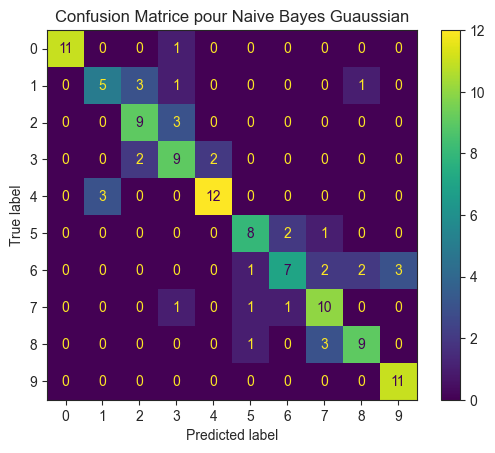

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred)).plot()
plt.title("Confusion Matrice pour Naive Bayes Guaussian")

#### 6. Comparez ses performances avec LDA et QDA. Que pouvez-vous conclure ?

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

- LDA :

In [52]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

accuracy_lda_test = accuracy_score(y_test, y_test_pred_lda)
accuracy_lda_train = accuracy_score(y_train, y_train_pred_lda)

print(f"Précision de LDA sur l'ensemble de train : {accuracy_lda_train}")
print(f"Précision de LDA sur l'ensemble de test : {accuracy_lda_test}")

Précision de LDA sur l'ensemble de train : 0.9173333333333333
Précision de LDA sur l'ensemble de test : 0.856


Text(0.5, 1.0, 'Confusion Matrice pour LDA')

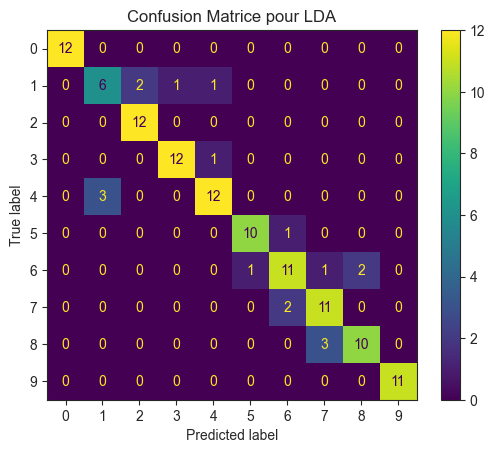

In [53]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred_lda)).plot()
plt.title("Confusion Matrice pour LDA")

- QDA :

In [54]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)

accuracy_qda_test = accuracy_score(y_test, y_test_pred_qda)
accuracy_qda_train = accuracy_score(y_train, y_train_pred_qda)

print(f"Précision de QDA sur l'ensemble de train : {accuracy_qda_train}")
print(f"Précision de QDA sur l'ensemble de test : {accuracy_qda_test}")

Précision de QDA sur l'ensemble de train : 0.984
Précision de QDA sur l'ensemble de test : 0.888


Text(0.5, 1.0, 'Confusion Matrice pour QDA')

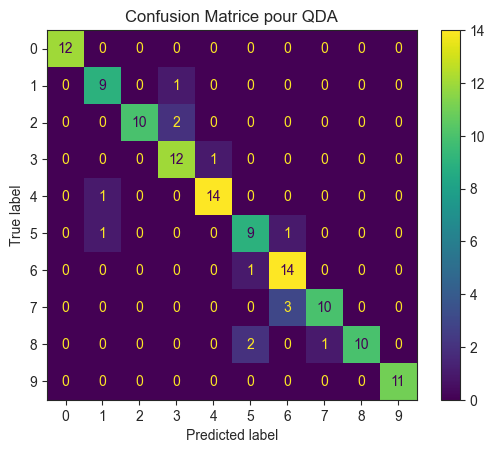

In [55]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred_qda)).plot()
plt.title("Confusion Matrice pour QDA")

En se basant sur la précision de l’ensemble de test, **QDA** est le plus performant avec **88.8%**, suivi de **LDA** à **85.6%**, tandis que **Naive Bayes** atteint seulement **73%**.   
Cela indique que **QDA** et **LDA** capturent mieux la structure des données, probablement en raison de leur capacité à modéliser des relations plus complexes (QDA) ou des frontières de décision linéaires (LDA), alors que Naive Bayes fait des hypothèses d'indépendance plus simplifiées.

#### 7. On souhaite à présent modéliser la distribution de chaque speaker par un mélange de Gaussiennes. Comment peut-on faire des prédictions avec un tel modèle ?

In [56]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
# Initialisation des paramètres
n_components = 1  # Choix du nombre de composantes pour chaque speaker
covariance_type = 'full'

# Stocker les modèles GMM pour chaque speaker
models = {}

# Entraîner un modèle pour chaque speaker
for speaker in np.unique(y_train):
    # Filtrer les données pour le speaker actuel
    X_train_speaker = X_train[y_train == speaker]
    
    # Initialiser et entraîner le GMM pour le speaker
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=0)
    gmm.fit(X_train_speaker)
    
    # Stocker le modèle GMM du speaker
    models[speaker] = gmm

# Fonction de prédiction
def predict_speaker(X):
    # Calculer les scores (log-vraisemblance) pour chaque modèle de speaker
    scores = np.array([model.score_samples(X) for model in models.values()]).T
    
    # Choisir le speaker avec le score maximal pour chaque échantillon
    predictions = np.argmax(scores, axis=1)
    return np.array(list(models.keys()))[predictions]

# Prédiction sur l'ensemble de test
y_pred = predict_speaker(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle GMM : {accuracy:.2%}")


Précision du modèle GMM : 88.00%


#### 8. Comparez les performances du mélange de Gaussienens en essayant plusieurs combinaisaisons de ses arguments (`n_components` et `covariance_type`). Que pouvez-vous conclure ?

In [57]:
# Options de paramètres
n_components_options = [1, 2, 3, 5]  # Nombre de composantes possibles
covariance_type_options = ['full', 'tied', 'diag', 'spherical']  # Types de covariance
reg_covar = 1e-6  # Valeur de régularisation de la covariance (peut être ajustée)

# Stocker les résultats
results = []

for n_components in n_components_options:
    for covariance_type in covariance_type_options:
        # Dictionnaire pour stocker les modèles par speaker
        models = {}
        
        for speaker in np.unique(y_train):
            # Filtrer les données pour le speaker actuel
            X_train_speaker = X_train[y_train == speaker]
            
            # Initialiser et entraîner le GMM avec régularisation
            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, 
                                  reg_covar=reg_covar, random_state=0)
            try:
                gmm.fit(X_train_speaker)
                models[speaker] = gmm
            except ValueError:
                print(f"Erreur pour le speaker {speaker} avec n_components={n_components} et covariance_type={covariance_type}")
                continue

        # Prédire sur l'ensemble de test
        def predict_speaker(X):
            scores = np.array([model.score_samples(X) for model in models.values()]).T
            predictions = np.argmax(scores, axis=1)
            return np.array(list(models.keys()))[predictions]
        
        y_pred = predict_speaker(X_test)
        
        # Calcul de l'accuracy pour la combinaison actuelle de paramètres
        accuracy = accuracy_score(y_test, y_pred)
        
        # Stocker les résultats
        results.append((n_components, covariance_type, accuracy))
        print(f"n_components={n_components}, covariance_type='{covariance_type}', Accuracy: {accuracy:.2f}")

# Tri des résultats par précision pour les afficher
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)
print("\nRésultats triés par précision :")
for res in sorted_results:
    print(f"n_components={res[0]}, covariance_type='{res[1]}', Accuracy: {res[2]:.2f}")


n_components=1, covariance_type='full', Accuracy: 0.88
n_components=1, covariance_type='tied', Accuracy: 0.88
n_components=1, covariance_type='diag', Accuracy: 0.74
n_components=1, covariance_type='spherical', Accuracy: 0.54
n_components=2, covariance_type='full', Accuracy: 0.80
n_components=2, covariance_type='tied', Accuracy: 0.90
n_components=2, covariance_type='diag', Accuracy: 0.80
n_components=2, covariance_type='spherical', Accuracy: 0.62
n_components=3, covariance_type='full', Accuracy: 0.65
n_components=3, covariance_type='tied', Accuracy: 0.90
Erreur pour le speaker 4 avec n_components=3 et covariance_type=diag
n_components=3, covariance_type='diag', Accuracy: 0.74
Erreur pour le speaker 4 avec n_components=3 et covariance_type=spherical
n_components=3, covariance_type='spherical', Accuracy: 0.66
n_components=5, covariance_type='full', Accuracy: 0.50
n_components=5, covariance_type='tied', Accuracy: 0.87
Erreur pour le speaker 4 avec n_components=5 et covariance_type=diag
n_c

- Les meilleurs résultats sont obtenus avec **n_components=2** et **n_components=3** et **covariance_type='tied'** .

#### 9. Comment peut-on utiliser le test du rapport de vraisemlance pour comparer ces modèles ? 

- **Hypothèse nulle $ H_0 $ :** Le modèle avec 2 composantes (GMM avec $ n\_\text{components} = 2 $) fournit un ajustement aux données aussi bon que le modèle avec 3 composantes. Autrement dit, il n'y a pas de gain significatif en utilisant un modèle avec plus de composantes pour représenter les données.

$$ \text{log-likelihood}_{\text{2 composantes}} = \text{log-likelihood}_{\text{3 composantes}} $$

- **Hypothèse alternative $ H_1 $ :** Le modèle avec 3 composantes (GMM avec $ n\_\text{components} = 3 $) fournit un ajustement significativement meilleur que le modèle avec 2 composantes, indiquant qu'un modèle plus complexe est nécessaire pour mieux capturer la distribution des données.

$$ \text{log-likelihood}_{\text{2 composantes}} \neq \text{log-likelihood}_{\text{3 composantes}} $$


**- Test du rapport de vraisemlance :**

In [58]:
from scipy.stats import chi2

# Charger et préparer les données
# X_train = ...  # Assurez-vous que X_train contient les données d'entraînement

# Entraîner les deux modèles GMM
gmm1 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm1.fit(X_train)
log_likelihood1 = gmm1.score(X_train) * X_train.shape[0]  # Log-vraisemblance totale

gmm2 = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm2.fit(X_train)
log_likelihood2 = gmm2.score(X_train) * X_train.shape[0]  # Log-vraisemblance totale

# Calcul du rapport de vraisemblance
lambda_stat = 2 * (log_likelihood2 - log_likelihood1)

# Calcul des degrés de liberté
# Par exemple, supposons que les deux modèles sont en covariance 'full' et ont d dimensions
d = X_train.shape[1]
params1 = 2 * (d + d * (d + 1) / 2)
params2 = 3 * (d + d * (d + 1) / 2)
ddl = params2 - params1

# Calcul de la p-valeur pour le test du chi-deux
p_value = chi2.sf(lambda_stat, ddl)

print(f"Statistique du rapport de vraisemblance: {lambda_stat:.2f}")
print(f"Degrés de liberté: {ddl}")
print(f"P-valeur: {p_value}")

if p_value < 0.05:
    print("Le modèle avec plus de composantes fournit un ajustement significativement meilleur.")
else:
    print("Pas de différence significative dans l'ajustement.")


Statistique du rapport de vraisemblance: 472.10
Degrés de liberté: 65.0
P-valeur: 4.26509739311806e-63
Le modèle avec plus de composantes fournit un ajustement significativement meilleur.


#### 10: Evaluez la performance avec le modèle de classification de votre choix (scikit-learn) et interpretez le résultat. Le meilleur score sur des données de validation (privées) aura une note supplémentaire.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Listes pour stocker les résultats
train_accuracies = []
test_accuracies = []

# Liste des modèles de classification
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0)
}

# Entraîner chaque modèle et évaluer les performances
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculer l'accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Stocker les résultats
    train_accuracies.append((model_name, train_accuracy))
    test_accuracies.append((model_name, test_accuracy))
    
    # Afficher les résultats pour chaque modèle
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

# Afficher tous les résultats triés par précision sur l'ensemble de test
print("\nRésultats triés par précision sur l'ensemble de test:")
sorted_test_accuracies = sorted(test_accuracies, key=lambda x: x[1], reverse=True)
for model_name, test_accuracy in sorted_test_accuracies:
    train_accuracy = dict(train_accuracies)[model_name]
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")


K-Nearest Neighbors - Train Accuracy: 0.86, Test Accuracy: 0.75
Support Vector Machine - Train Accuracy: 0.99, Test Accuracy: 0.86
Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.58
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.77
Logistic Regression - Train Accuracy: 0.92, Test Accuracy: 0.78

Résultats triés par précision sur l'ensemble de test:
Support Vector Machine - Train Accuracy: 0.99, Test Accuracy: 0.86
Logistic Regression - Train Accuracy: 0.92, Test Accuracy: 0.78
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.77
K-Nearest Neighbors - Train Accuracy: 0.86, Test Accuracy: 0.75
Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



- On va prendre 60% des donnees pour l'entrainement, 20% pour le test et 20% pour la validation.

In [60]:
# Première division pour obtenir un ensemble d'entraînement et un ensemble temporaire
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)

# Deuxième division de l'ensemble temporaire pour obtenir validation et test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Calcul de l'accuracy pour chaque modèle sur train, validation et test
for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calcul de l'accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Afficher les résultats
    print(f"{name}:")
    print(f"  Accuracy sur l'entraînement: {train_accuracy:.2f}")
    print(f"  Accuracy sur le test: {test_accuracy:.2f}")
    print(f"  Accuracy sur la validation: {val_accuracy:.2f}\n")

K-Nearest Neighbors:
  Accuracy sur l'entraînement: 0.86
  Accuracy sur le test: 0.68
  Accuracy sur la validation: 0.79

Support Vector Machine:
  Accuracy sur l'entraînement: 0.99
  Accuracy sur le test: 0.83
  Accuracy sur la validation: 0.82

Decision Tree:
  Accuracy sur l'entraînement: 1.00
  Accuracy sur le test: 0.59
  Accuracy sur la validation: 0.60

Random Forest:
  Accuracy sur l'entraînement: 1.00
  Accuracy sur le test: 0.75
  Accuracy sur la validation: 0.77

Logistic Regression:
  Accuracy sur l'entraînement: 0.96
  Accuracy sur le test: 0.74
  Accuracy sur la validation: 0.75



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



- Le modèle ayant obtenu le meilleur score sur les données de validation est : **Support Vector Machine (SVM)**.

#### Bonus: Enrichissez le dataset avec des enregistrements de votre propre voix. Le modèle est-il capable de vous reconnaitre ?

In [61]:
import os

# Chemin vers le dossier contenant les fichiers audio .wav
folder_path = r"C:/Users/HP\Desktop/Projet_Statistique_Multivarie/project_starter\audios"

# Paramètres
n_recordings = 30
n_coefs = 10  # Nombre de coefficients MFCC

# Liste pour stocker les données du dataset
data = []

# Parcourir tous les fichiers .wav dans le dossier
for recording_id, file_name in enumerate(os.listdir(folder_path), start=1):
    if file_name.endswith(".wav") and recording_id <= n_recordings:
        # Chemin complet du fichier audio
        full_file_path = os.path.join(folder_path, file_name)
        
        # Charger l'audio avec librosa
        try:
            y, sr = librosa.load(full_file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coefs).mean(axis=1)
            
            # Ajouter les informations pour chaque fichier
            row_data = {
                'FileName': file_name,
                'Gender': 'm',            # Supposé comme 'm', modifiable si nécessaire
                'SpeakerID': 10,          # ID de l'interlocuteur, modifiable si nécessaire
                'RecordingID': recording_id
            }
            # Ajouter chaque coefficient MFCC en tant que colonne
            for i in range(n_coefs):
                row_data[f'MFCC_{i+1}'] = mfcc[i]
            
            # Ajouter la ligne au dataset
            data.append(row_data)
        
        except Exception as e:
            print(f"Erreur lors du traitement de {file_name}: {e}")

# Créer le DataFrame à partir des données
data_propre = pd.DataFrame(data)

# Afficher et sauvegarder le DataFrame
print(data_propre.head())
data_propre.to_csv("audio_dataset.csv", index=False)
print("Dataset créé et sauvegardé sous 'audio_dataset.csv'")


                                            FileName Gender  SpeakerID  \
0  WhatsApp_Audio_20241110_à_17.03.42_e1365492.wa...      m         10   
1  WhatsApp_Audio_20241110_à_17.03.53_314de098.wa...      m         10   
2  WhatsApp_Audio_20241110_à_17.04.57_187aefab.wa...      m         10   
3  WhatsApp_Audio_20241110_à_17.05.06_8a67a485.wa...      m         10   
4  WhatsApp_Audio_20241110_à_17.05.15_139907cd.wa...      m         10   

   RecordingID      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0            1 -409.924469  93.478333  12.355265  32.322983  18.146904   
1            2 -353.183594  74.487946  27.264940  48.069912  -3.084020   
2            3 -441.948181  72.475838  20.277792  39.130638   2.327709   
3            4 -349.856445  88.758888  29.450577  52.606888  -5.944115   
4            5 -368.518402  87.385040  13.515821  44.552917   7.109288   

     MFCC_6     MFCC_7    MFCC_8     MFCC_9    MFCC_10  
0  0.870184 -17.155094  4.730425  -8.291381 -11.59527

In [62]:
data_propre.head(3)

FileName Gender  SpeakerID  \
0  WhatsApp_Audio_20241110_à_17.03.42_e1365492.wa...      m         10   
1  WhatsApp_Audio_20241110_à_17.03.53_314de098.wa...      m         10   
2  WhatsApp_Audio_20241110_à_17.04.57_187aefab.wa...      m         10   

   RecordingID      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0            1 -409.924469  93.478333  12.355265  32.322983  18.146904   
1            2 -353.183594  74.487946  27.264940  48.069912  -3.084020   
2            3 -441.948181  72.475838  20.277792  39.130638   2.327709   

     MFCC_6     MFCC_7    MFCC_8    MFCC_9    MFCC_10  
0  0.870184 -17.155094  4.730425 -8.291381 -11.595270  
1  8.159304 -12.881674 -7.010940 -4.315077  -7.766172  
2  1.939173  -7.226953 -7.143674  0.402618  -2.011796

In [63]:
new_df = pd.concat([df, data_propre], ignore_index=True)
new_df

FileName Gender  SpeakerID  \
0                             m0001_us_m0001_00001.wav      m          0   
1                             m0001_us_m0001_00002.wav      m          0   
2                             m0001_us_m0001_00003.wav      m          0   
3                             m0001_us_m0001_00004.wav      m          0   
4                             m0001_us_m0001_00005.wav      m          0   
..                                                 ...    ...        ...   
525  WhatsApp_Audio_20241110_à_17.08.10_fc5a104a.wa...      m         10   
526  WhatsApp_Audio_20241110_à_17.08.16_db3248ae.wa...      m         10   
527  WhatsApp_Audio_20241110_à_17.08.22_2756f96a.wa...      m         10   
528  WhatsApp_Audio_20241110_à_17.08.45_c927a756.wa...      m         10   
529  WhatsApp_Audio_20241110_à_17.08.51_c9fbb80c.wa...      m         10   

     RecordingID      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0              1 -432.045410  119.769264  -3.836545  25.336601 -13.802795   
1              2 -448.635986  114.177422  -5.153250  16.764275 -20.626694   
2              3 -433.696320   94.268814  -3.704444  24.321095 -15.773800   
3              4 -427.338989  113.769791  -8.063370  25.546106 -15.735123   
4              5 -412.676575  102.270454  -9.136461  29.005512 -12.034924   
..           ...         ...         ...        ...        ...        ...   
525           26 -315.444977   81.408493  12.954025  52.659344   9.287271   
526           27 -300.983154  108.748566  16.591713  32.042244  -7.106307   
527           28 -275.954620   97.517166   9.698200  49.639549   5.577400   
528           29 -401.533478   94.929291  26.074638  30.634739   0.244771   
529           30 -382.907532   92.665695  17.043364  25.864141  -0.605268   

        MFCC_6     MFCC_7    MFCC_8     MFCC_9   MFCC_10  
0    16.731417  -2.733350  2.620323  -9.290769  3.606286  
1    20.666161  -5.741008  9.305303  -5.688132  0.833428  
2    16.456257   0.998080  5.189481  -8.003876  4.879941  
3    12.846508  -0.483539  5.328898 -16.783321  1.889776  
4    23.754642  -7.142556 -0.976251 -14.627462  3.513206  
..         ...        ...       ...        ...       ...  
525   4.089974  -9.676102  2.903394 -12.521362 -5.582081  
526   6.422534 -15.453454 -0.743828 -10.458586  2.811555  
527  -3.980899 -25.107372  5.096485 -11.174180 -0.232757  
528   5.594880   1.545930 -6.542340  -5.850178  1.126810  
529   4.227332  -2.267958 -4.722786  -6.355442  4.662474  

[530 rows x 14 columns]

In [64]:
X = new_df[[f"MFCC_{i}" for i in range(1, 11)]].values
y = new_df.SpeakerID.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.25)

In [65]:
# Listes pour stocker les résultats
train_accuracies = []
test_accuracies = []


# Entraîner chaque modèle et évaluer les performances
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculer l'accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Stocker les résultats
    train_accuracies.append((model_name, train_accuracy))
    test_accuracies.append((model_name, test_accuracy))
    
    # Afficher les résultats pour chaque modèle
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

# Afficher tous les résultats triés par précision sur l'ensemble de test
print("\nRésultats triés par précision sur l'ensemble de test:")
sorted_test_accuracies = sorted(test_accuracies, key=lambda x: x[1], reverse=True)
for model_name, test_accuracy in sorted_test_accuracies:
    train_accuracy = dict(train_accuracies)[model_name]
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

K-Nearest Neighbors - Train Accuracy: 0.84, Test Accuracy: 0.81
Support Vector Machine - Train Accuracy: 0.99, Test Accuracy: 0.89
Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.61
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.83
Logistic Regression - Train Accuracy: 0.91, Test Accuracy: 0.83

Résultats triés par précision sur l'ensemble de test:
Support Vector Machine - Train Accuracy: 0.99, Test Accuracy: 0.89
Logistic Regression - Train Accuracy: 0.91, Test Accuracy: 0.83
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.83
K-Nearest Neighbors - Train Accuracy: 0.84, Test Accuracy: 0.81
Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.61


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



- On test les models sur deux audios :

In [66]:
# Chemin vers le dossier contenant les fichiers audio .wav
folder_path = r"C:/Users/HP\Desktop/Projet_Statistique_Multivarie/project_starter\audio_test"

# Paramètres
n_recordings = 2
n_coefs = 10  # Nombre de coefficients MFCC

# Liste pour stocker les données du dataset
data = []

# Parcourir tous les fichiers .wav dans le dossier
for recording_id, file_name in enumerate(os.listdir(folder_path), start=1):
    if file_name.endswith(".opus") and recording_id <= n_recordings:
        # Chemin complet du fichier audio
        full_file_path = os.path.join(folder_path, file_name)
        
        # Charger l'audio avec librosa
        try:
            y, sr = librosa.load(full_file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coefs).mean(axis=1)
            
            # Ajouter les informations pour chaque fichier
            row_data = {
                'FileName': file_name,
                'Gender': 'm',            # Supposé comme 'm', modifiable si nécessaire
                'SpeakerID': 10,          # ID de l'interlocuteur, modifiable si nécessaire
                'RecordingID': recording_id
            }
            # Ajouter chaque coefficient MFCC en tant que colonne
            for i in range(n_coefs):
                row_data[f'MFCC_{i+1}'] = mfcc[i]
            
            # Ajouter la ligne au dataset
            data.append(row_data)
        
        except Exception as e:
            print(f"Erreur lors du traitement de {file_name}: {e}")

# Créer le DataFrame à partir des données
data_test = pd.DataFrame(data)

# Afficher et sauvegarder le DataFrame
print(data_test.head())
data_test.to_csv("audio_dataset.csv", index=False)
print("Dataset créé et sauvegardé sous 'audio_dataset.csv'")


           FileName Gender  SpeakerID  RecordingID      MFCC_1      MFCC_2  \
0  audio1_test.opus      m         10            1 -317.297394  105.647438   
1  audio2_test.opus      m         10            2 -337.663635  104.832237   

      MFCC_3     MFCC_4     MFCC_5    MFCC_6    MFCC_7    MFCC_8     MFCC_9  \
0  10.407159  48.290131 -22.114471 -2.826653 -2.243200 -7.216699 -14.227232   
1  22.227741  55.191723 -13.665516 -3.698001  2.110707 -4.867695 -14.991178   

    MFCC_10  
0 -8.616900  
1 -9.524954  
Dataset créé et sauvegardé sous 'audio_dataset.csv'


In [67]:
data_test

FileName Gender  SpeakerID  RecordingID      MFCC_1      MFCC_2  \
0  audio1_test.opus      m         10            1 -317.297394  105.647438   
1  audio2_test.opus      m         10            2 -337.663635  104.832237   

      MFCC_3     MFCC_4     MFCC_5    MFCC_6    MFCC_7    MFCC_8     MFCC_9  \
0  10.407159  48.290131 -22.114471 -2.826653 -2.243200 -7.216699 -14.227232   
1  22.227741  55.191723 -13.665516 -3.698001  2.110707 -4.867695 -14.991178   

    MFCC_10  
0 -8.616900  
1 -9.524954

In [68]:
# X_test contient les MFCC extraits du jeu de données de test
X_test = data_test[['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 
                    'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10']]

# Dictionnaire pour stocker les prédictions
predictions = {}

# Appliquer chaque modèle et faire les prédictions
for model_name, model in models.items():
    # Faire des prédictions sur les données de test
    y_pred = model.predict(X_test)
    
    # Stocker les prédictions dans le dictionnaire
    predictions[model_name] = y_pred
    
    # Afficher les prédictions pour chaque modèle
    print(f"Prédictions pour {model_name}:")
    print(y_pred)
    print("\n")


Prédictions pour K-Nearest Neighbors:
[10 10]


Prédictions pour Support Vector Machine:
[10 10]


Prédictions pour Decision Tree:
[0 0]


Prédictions pour Random Forest:
[10 10]


Prédictions pour Logistic Regression:
[10 10]




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but SVC was fitted without feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Les modèles KNN, SVM, Random Forest et Logistic Regression ont bien effectué les prédictions.